When constructing a model, data availability may become an issue. In order to avoid overfitting, it is necessary to withhold some portion of the data as a test set. However, overfitting on the test set may also occur without a secondary validation step. SIGH.

Let's explore methods of cross validation. 

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from collections import OrderedDict
from sklearn.externals import joblib

In [69]:
raw = load_iris()

In [70]:
rawData = raw["data"]

In [71]:
rawData[0:5]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

In [72]:
X = rawData[:, 0:2]
# all the rows and first 2 columns

In [73]:
X[:5]

array([[ 5.1,  3.5],
       [ 4.9,  3. ],
       [ 4.7,  3.2],
       [ 4.6,  3.1],
       [ 5. ,  3.6]])

In [74]:
rawTarget = raw["target"]

In [75]:
rawTarget[0:5]

array([0, 0, 0, 0, 0])

In [76]:
y = rawTarget

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

In [78]:
m = GaussianNB()

## Cross Validation

In [79]:
scores = cross_val_score(m, X_train, y_train, cv = 5)
print(scores)

[ 0.68421053  0.68421053  0.83333333  0.76470588  0.70588235]


The cross validation values represent how well (with 1 being the perfect score) the model performs agianst a small untrained portion of the data for the classification task

## Training the new model
Since the CV values are pretty high, let's proceed

In [80]:
fitted = m.fit(X_train, y_train)

In [81]:
labels = m.predict(X_test)

In [82]:
labels

array([1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2])

In [83]:
colors = ["red", "blue", "green"]

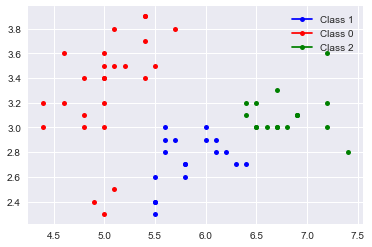

In [84]:
# iterate over the labels and assign a color to each point
for i in range(0, len(X_test)):
    col = colors[labels[i]]
    plt.plot(X_test[:, 0][i], X_test[:, 1][i], color = col, marker = "o", 
                markersize = 5, label = "Class %i" % labels[i])

# cut out duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = "upper right")
plt.show()

## Saving and loading the models through pickling/joblib

In many cases, the model being trained will be used more than once for the same or different data. For large datasets, training can be computationally expensive. For these reasons, it is often necessary to save a trained model so it can be loaded later. This can be done via joblib.

In [85]:
from sklearn.externals import joblib

In [86]:
joblib.dump(m, "GaussianIris.pkl")

['GaussianIris.pkl']

joblib makes loading in pickled models pretty easy

In [87]:
loaded_model = joblib.load("GaussianIris.pkl")

In [88]:
labels = loaded_model.predict(X_test)

In [89]:
labels

array([1, 0, 0, 2, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0,
       2, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2,
       2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 1, 2])

In [90]:
colors = ["red", "blue", "green"]

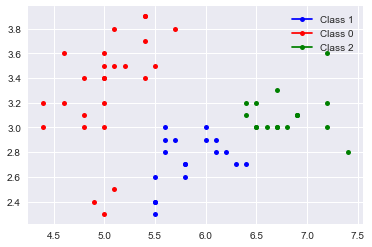

In [91]:
for i in range(0, len(X_test)):
    col = colors[labels[i]]
    plt.plot(X_test[:,0][i], X_test[:, 1][i], color = col, marker = "o", 
                    markersize = 5, label = "Class %i" % labels[i])
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc = "upper right")
plt.show()

Results are exactly the same. joblib and the pickle module is by no means your only option for model storage. cPickle is faster. 